## Task 1.1 two_dim_data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

ModuleNotFoundError: No module named 'scipy.datasets'

In [13]:
# TODO: Load the dataset from the file pca_dataset.txt
data = np.loadtxt('../../data/pca_dataset.txt')

In [14]:
# TODO: Compute mean of the data
mean = np.mean(data, axis=0)

In [15]:
# TODO: Center data
data_centered = utils.center_data(data)

In [4]:
# TODO: Compute SVD
U, S, Vt = utils.compute_svd(data_centered)

NameError: name 'utils' is not defined

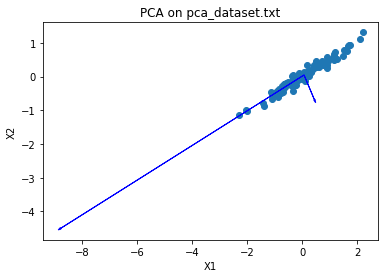

In [17]:
# TODO: Plot principal components
x = []
y = []
for i in range(len(data)):
    x.append(data[i][0])
    y.append(data[i][1])
plt.scatter(x, y)

for i in range(2):
    plt.arrow(mean[0], mean[1], Vt[i, 0]*S[i], Vt[i, 1]*S[i], head_width=0.05, head_length=0.1, fc='blue', ec='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA on pca_dataset.txt')
plt.show()

In [18]:
# TODO: Analyze the energy captured by the first two principal components using utils.compute_energy()
print("The energy captured by the 1st principal component is {}".format(utils.compute_energy(S, 1)))
print("The energy captured by the 2st principal component is {}".format(utils.compute_energy(S, 2)))

The energy captured by the 1st principal component is 99.31426561434292
The energy captured by the 2st principal component is 0.6857343856570883


## Task 1.2 racoon

In [19]:
racoon  = utils.load_resize_image()
data = racoon.T

In [20]:
import numpy as np
mean = np.mean(data, axis=0)
face_centered = data - mean
U, S, Vt = utils.compute_svd(face_centered)

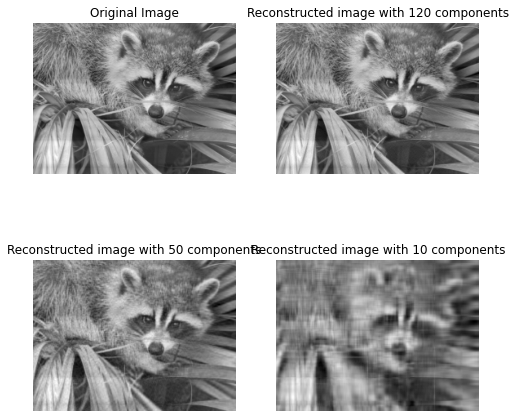

In [21]:
utils.reconstruct_images(U, S, Vt)

In [23]:
num_components = utils.compute_num_components_capturing_threshold_energy(S)
print('At what number is the energy lost through truncation smaller than 1%?')
print(num_components)

At what number is the energy lost through truncation smaller than 1%?
76


## Task 1.3 pedestrian

In [24]:
# TODO: Load trajectory data in data_DMAP_PCA_Vadere.txt. (Hint: You may need to use a space as delimiter)
data = np.loadtxt('../../data/data_DMAP_PCA_Vadere.txt', delimiter=' ')

In [25]:
# TODO: Center the data by subtracting the mean
mean = np.mean(data, axis=0)
data_centered = data - mean

In [26]:
# TODO: Extract positions of pedestrians 1 and 2
pedestrian_1 = data[:, :2]
pedestrian_2 = data[:, 2:4]

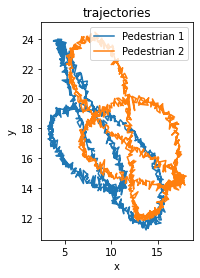

In [27]:
# TODO: Visualize trajectories of first two pedestrians (Hint: You can optionally use utils.visualize_traj_two_pedestrians() )
utils.visualize_traj_two_pedestrians(pedestrian_1, pedestrian_2, ('trajectories', 'x', 'y'))
plt.show()

In [28]:
# TODO: Compute SVD of the data using utils.compute_svd()
U, S, Vt = utils.compute_svd(data_centered)

In [30]:
# TODO: Reconstruct data by truncating SVD using utils.reconstruct_data_using_truncated_svd()
num_components = 2
data_reconstructed_T = utils.reconstruct_data_using_truncated_svd(U, S, Vt, num_components)
data_reconstructed = data_reconstructed_T

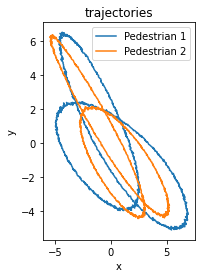

In [32]:
# TODO: Visualize trajectories of the first two pedestrians in the 2D space defined by the first two principal components
pedestrian_1_re_centered = data_reconstructed[:, :2]
pedestrian_2_re_centered = data_reconstructed[:, 2:4]
utils.visualize_traj_two_pedestrians(pedestrian_1_re_centered, pedestrian_2_re_centered, ('trajectories', 'x', 'y'))
plt.show()

In [42]:
# TODO: Answer the questionsin the worksheet with the help of utils.compute_cumulative_energy(), utils.compute_num_components_capturing_threshold_energy()
cumulative_energy = utils.compute_cumulative_energy(S, 2)
print('Are two components enough to capturemost of the energy (> 90%) of the data set?')
print(cumulative_energy)
num_components = utils.compute_num_components_capturing_threshold_energy(S, 0.1)
print('How many do you need to capture most of the energy?')
print(num_components)

Are two components enough to capturemost of the energy (> 90%) of the data set?
0.8492464226063753
How many do you need to capture most of the energy?
3


In [43]:
n = len(data)
L2_loss =np.mean(np.sqrt(np.mean(np.square(data_centered - data_reconstructed),1)))
print(L2_loss)

1.2443006434162398
